<a href="https://colab.research.google.com/github/praveen21-tech/AI-Code-Optimisation-and-Bug-fixing/blob/main/OpenPose_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rkuo2000_openpose_pretrained_models_path = kagglehub.dataset_download('rkuo2000/openpose-pretrained-models')
rkuo2000_input_poses_path = kagglehub.dataset_download('rkuo2000/input-poses')

print('Data source import complete.')


100%|██████████| 316M/316M [00:03<00:00, 103MB/s] 

Extracting files...


100%|██████████| 2.27M/2.27M [00:00<00:00, 85.4MB/s]

Extracting files...
Data source import complete.


# OpenPose PyTorch

## Repro [Github](https://github.com/Hzzone/pytorch-openpose)

In [2]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 154 (delta 69), reused 152 (delta 67), pack-reused 0 (from 0)
Receiving objects: 100% (154/154), 20.18 MiB | 26.06 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/content/pytorch-openpose


In [3]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

In [7]:
# Mount Google Drive (if you haven't already)
from google.colab import drive
drive.mount('/content/drive')

# The path to the pytorch-openpose folder (assuming you added the shortcut to the root of My Drive)
pytorch_openpose_path = '/content/drive/MyDrive/pytorch-openpose'

# Now you can use this path to access files within the shared folder
# For example:
model_path = f'{pytorch_openpose_path}/model/body_pose_model.pth'
print(model_path) # Output: /content/drive/MyDrive/pytorch-openpose/model/body_pose_model.pth

Mounted at /content/drive
/content/drive/MyDrive/pytorch-openpose/model/body_pose_model.pth


## set Pretrained Models

In [8]:
!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model

cp: cannot stat '/kaggle/input/openpose-pretrained-models/body_pose_model.pth': No such file or directory
cp: cannot stat '/kaggle/input/openpose-pretrained-models/hand_pose_model.pth': No such file or directory


In [10]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

In [11]:
test_image = 'images/demo.jpg'
#test_image = '/kaggle/input/input-poses/baseball1.jpg'
#test_image = '/kaggle/input/input-poses/baseball2.jpg'
#test_image = '/kaggle/input/input-poses/baseketball.jpg'
#test_image = '/kaggle/input/input-poses/fall1.jpg'
#test_image = '/kaggle/input/input-poses/fall2.jpg'
#test_image = '/kaggle/input/input-poses/fall3.jpg'
#test_image = '/kaggle/input/input-poses/racers.jpg'
#test_image = '/kaggle/input/input-poses/skiing.jpg'
#test_image = '/kaggle/input/input-poses/tennis.jpg'
#test_image = '/kaggle/input/input-poses/volley.jpg'
#test_image = '/kaggle/input/input-poses/volleyball.jpg'

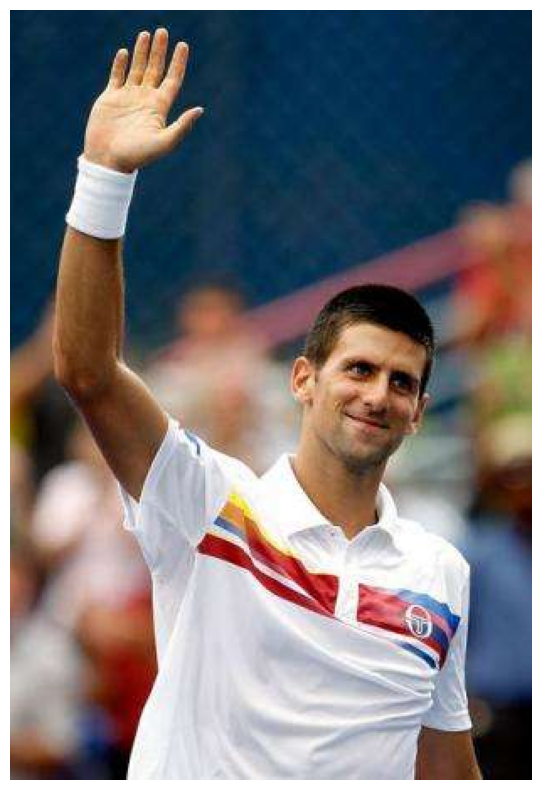

In [12]:
import matplotlib.pyplot as plt
image = plt.imread(test_image)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

## Detect Body

#### keypoints index : index = int(subset[n][i])
#### keypoints corrd : x,y = candidate[index][0:2]

In [13]:
# enable GPU for acceleration
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

25
2


## Detect Hand

In [14]:
# detect hand
hands_list = util.handDetect(candidate, subset, oriImg)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

## Display Result

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [ ]:
pip install matplotlib==3.3.4